In [1]:
!pip install yfinance 

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# ticker symbol of the company

ticker_symbol = 'RELIANCE.NS' #company data required


In [15]:
def fetching_data(ticker_symbol): 
   company_data = yf.Ticker(ticker_symbol)
   start_date = '2019-04-25'
   end_date = '2024-08-25'

# Retrieve company information
   company_info = company_data.info
   df_info = pd.DataFrame(company_info)

# Retrieve historical stock prices
   historical_prices = company_data.history(start=start_date, end=end_date)
   historical_prices.index = pd.to_datetime(historical_prices.index)
   df_historical_prices= pd.DataFrame(historical_prices)

# Retrieve financial ratios
   financial_ratios = company_data.financials
   df_financial_ratios = pd.DataFrame(financial_ratios)


# Retrieve balance sheet
   balance_sheet = company_data.balance_sheet
   df_balance_sheet = pd.DataFrame(balance_sheet)

#returning created dataframes to be used in other functions
   return df_info,  df_historical_prices, df_financial_ratios, df_balance_sheet 


In [16]:
fetching_data(ticker_symbol)

(            address1                     address2    city     zip country  \
 0  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 1  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 2  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 3  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 4  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 5  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 6  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 7  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 8  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 9  Maker Chambers IV  3rd Floor 222 Nariman Point  Mumbai  400021   India   
 
              phone              fax              website  \
 0  91 22 3555 5000  91 22 2204 2268  https://www.ril.com   
 1  91 22 3555 500

In [17]:

df_info, df_historical_prices, df_financial_ratios, df_balance_sheet = fetching_data(ticker_symbol)

# Accessing historical prices data
print(df_historical_prices)

                                  Open         High          Low        Close  \
Date                                                                            
2019-04-25 00:00:00+05:30  1240.354927  1261.159962  1216.692512  1225.443115   
2019-04-26 00:00:00+05:30  1227.764696  1246.471368  1223.925132  1243.658691   
2019-04-30 00:00:00+05:30  1246.873111  1246.873111  1220.442725  1243.658691   
2019-05-02 00:00:00+05:30  1242.944357  1262.499340  1234.104465  1254.597046   
2019-05-03 00:00:00+05:30  1257.186385  1265.713824  1252.453926  1257.989990   
...                                ...          ...          ...          ...   
2024-08-19 00:00:00+05:30  2965.000000  2996.600098  2961.000000  2976.800049   
2024-08-20 00:00:00+05:30  2994.449951  3007.850098  2980.050049  2991.899902   
2024-08-21 00:00:00+05:30  2986.500000  3015.750000  2980.000000  2997.350098   
2024-08-22 00:00:00+05:30  3006.000000  3013.000000  2981.300049  2996.250000   
2024-08-23 00:00:00+05:30  3

# Simple Moving Average

In [8]:
''''
Simple Moving Average (SMA):

The Simple Moving Average (SMA) is a widely used technical analysis tool that smoothens out price data 
by calculating an average of the closing prices over a specified period. 
It is called "simple" because it equally weights each data point in the calculation, 
without giving more weight to any particular data point.

The SMA is useful for identifying trends and determining potential support and resistance levels in financial markets. 
Traders often use SMAs of different periods to identify short-term and long-term trends. 
When the current price crosses above the SMA, it may indicate a bullish trend, 
while a cross below the SMA may suggest a bearish trend.

9 or 10 period: Very popular and extremely fast-moving. Often used as a directional filter (more later)
21 period: Medium-term and the most accurate moving average. Good when it comes to riding trends
50 period: Long-term moving average and best suited for identifying the longer-term direction

Source - https://tradeciety.com
'''

'\'\nSimple Moving Average (SMA):\n\nThe Simple Moving Average (SMA) is a widely used technical analysis tool that smoothens out price data \nby calculating an average of the closing prices over a specified period. \nIt is called "simple" because it equally weights each data point in the calculation, \nwithout giving more weight to any particular data point.\n\nThe SMA is useful for identifying trends and determining potential support and resistance levels in financial markets. \nTraders often use SMAs of different periods to identify short-term and long-term trends. \nWhen the current price crosses above the SMA, it may indicate a bullish trend, \nwhile a cross below the SMA may suggest a bearish trend.\n\n9 or 10 period: Very popular and extremely fast-moving. Often used as a directional filter (more later)\n21 period: Medium-term and the most accurate moving average. Good when it comes to riding trends\n50 period: Long-term moving average and best suited for identifying the longer-t

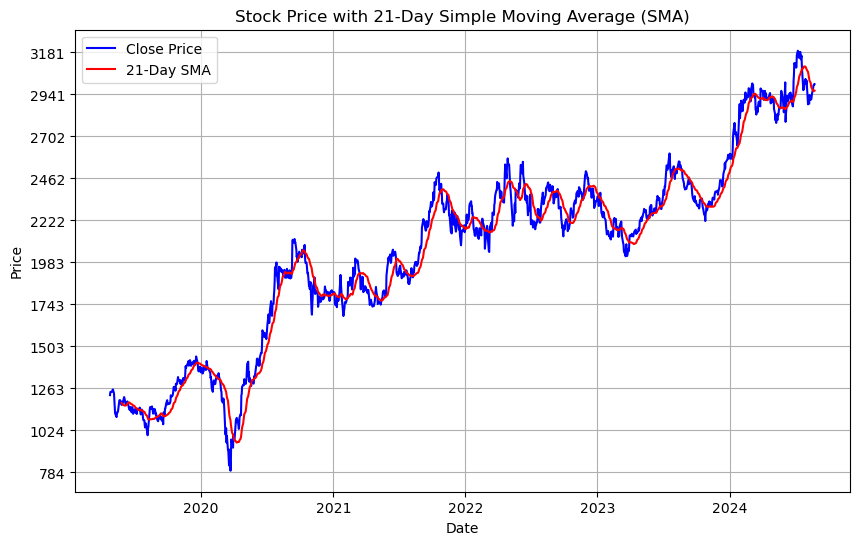

In [18]:
data = df_historical_prices
window = 21

def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

sma_21 = calculate_sma(data,window)

y_min = data['Close'].min()
y_max = data['Close'].max()
y_range = y_max - y_min

# Plot original price data and SMA
plt.figure(figsize=(10, 6))
plt.plot(df_historical_prices['Close'], label='Close Price', color='blue')
plt.plot(sma_21, label='21-Day SMA', color='red')
plt.title('Stock Price with 21-Day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.yticks(np.arange(y_min - 10, y_max + 10, y_range / 10))

plt.show()


# EMA

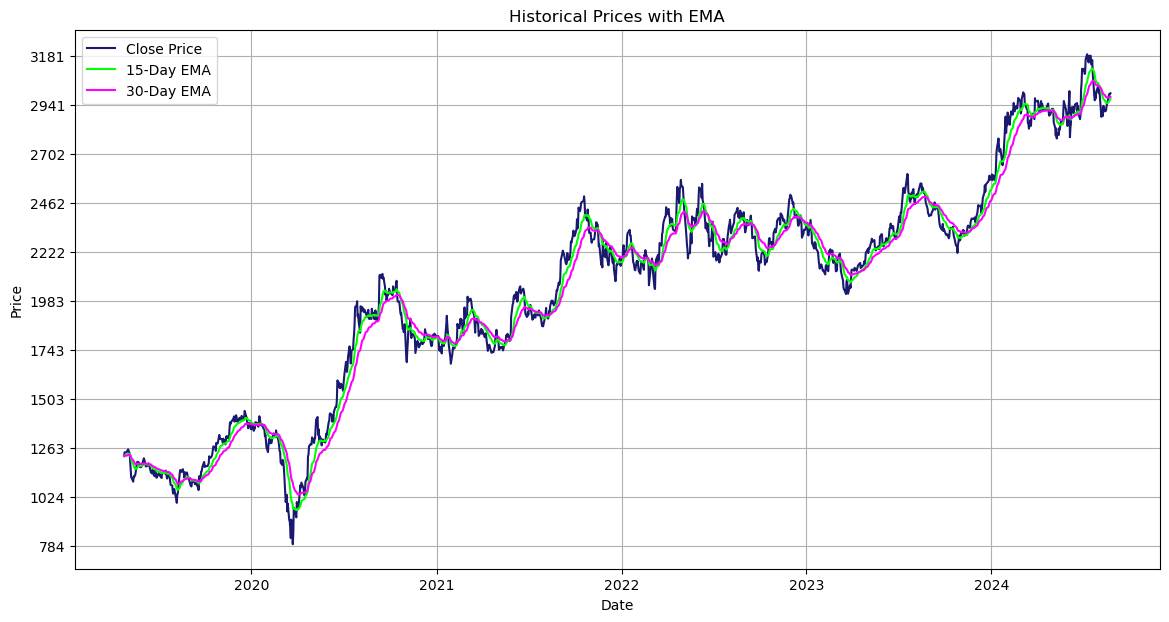

In [19]:
historical_prices = fetching_data(ticker_symbol)


# Calculate Exponential Moving Average (EMA)
ema_short = data['Close'].ewm(span=15, adjust=False).mean()
ema_long = data['Close'].ewm(span=30, adjust=False).mean()

# Plot historical prices and EMA

y_min = data['Close'].min()
y_max = data['Close'].max()
y_range = y_max - y_min



plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price', color ='midnightblue')
plt.plot(data.index, ema_short, label='15-Day EMA', color='lime')
plt.plot(data.index, ema_long, label='30-Day EMA', color='magenta')
plt.title('Historical Prices with EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(y_min - 10, y_max + 10, y_range / 10))

plt.show()

# RSI

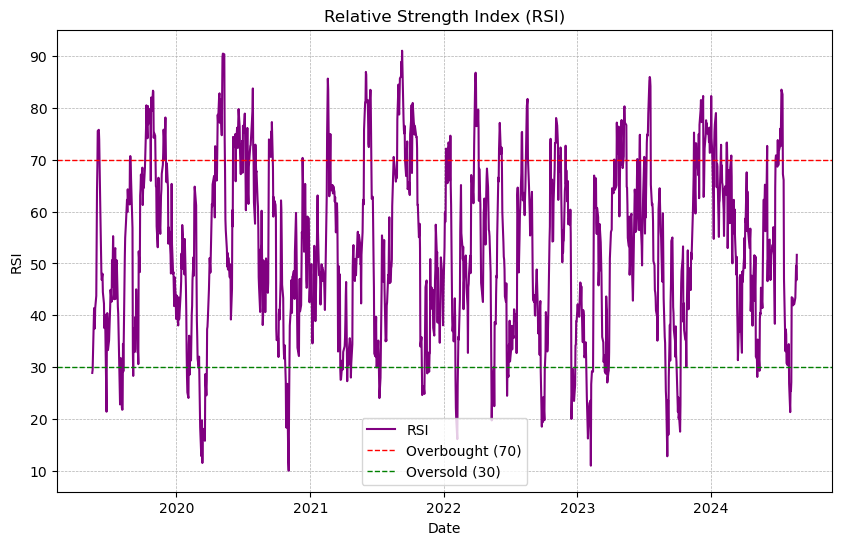

RSI Statistics:
Mean: 52.808833747128524
Standard Deviation: 16.74569557419425
Number of Overbought Signals: 248
Number of Oversold Signals: 123


In [20]:
data = df_historical_prices
window = 14

def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_values = calculate_rsi(data, window)



plt.figure(figsize=(10, 6))
plt.plot(rsi_values, label='RSI', color='purple')

# Customize gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enable gridlines
plt.axhline(y=70, color='r', linestyle='--', linewidth=1, label='Overbought (70)')  # Overbought line
plt.axhline(y=30, color='g', linestyle='--', linewidth=1, label='Oversold (30)')      # Oversold line

plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)



plt.show()

# Identify overbought and oversold conditions
overbought = rsi_values > 70
oversold = rsi_values < 30

# Print statistics
print("RSI Statistics:")
print("Mean:", rsi_values.mean())
print("Standard Deviation:", rsi_values.std())
print("Number of Overbought Signals:", overbought.sum())
print("Number of Oversold Signals:", oversold.sum())




# MACD

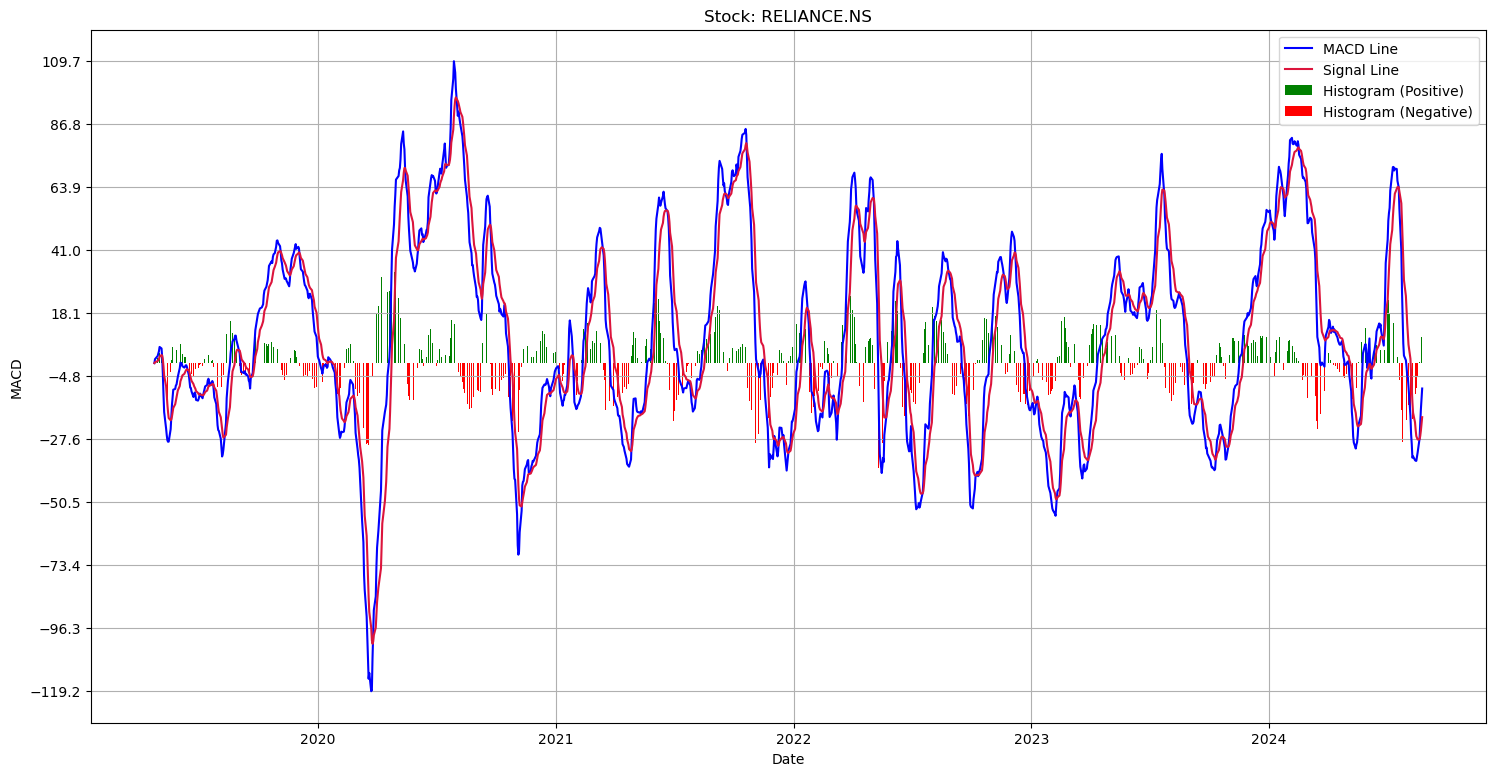

In [21]:

data = df_historical_prices
short_window = 12
long_window = 26
signal_window = 9

def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, min_periods=1, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

macd_line, signal_line, histogram = calculate_macd(data, short_window, long_window, signal_window)


# Plotting MACD Line, Signal Line, and Histogram
plt.figure(figsize=(18, 9))
plt.plot(data.index, macd_line, label='MACD Line', color='blue') #MACD Line
plt.plot(data.index, signal_line, label='Signal Line', color='crimson') #Signal Line

# Plotting histogram bars above zero line (positive values) in green
plt.bar(data.index[histogram >= 0], histogram[histogram >= 0], color='green', width=0.6, label='Histogram (Positive)')

# Plotting histogram bars below zero line (negative values) in red
plt.bar(data.index[histogram < 0], histogram[histogram < 0], color='red', width=0.6, label='Histogram (Negative)')
plt.title('Stock: ' + ticker_symbol)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.grid(True)

y_min = min(macd_line.min(), signal_line.min(), histogram.min())
y_max = max(macd_line.max(), signal_line.max(), histogram.max())
y_range = y_max - y_min
plt.yticks(np.arange(y_min, y_max + 1, y_range / 10))
# Setting the background color
#plt.gca().set_facecolor('black')  

plt.show()



# Buy Sell Signals Trial 1

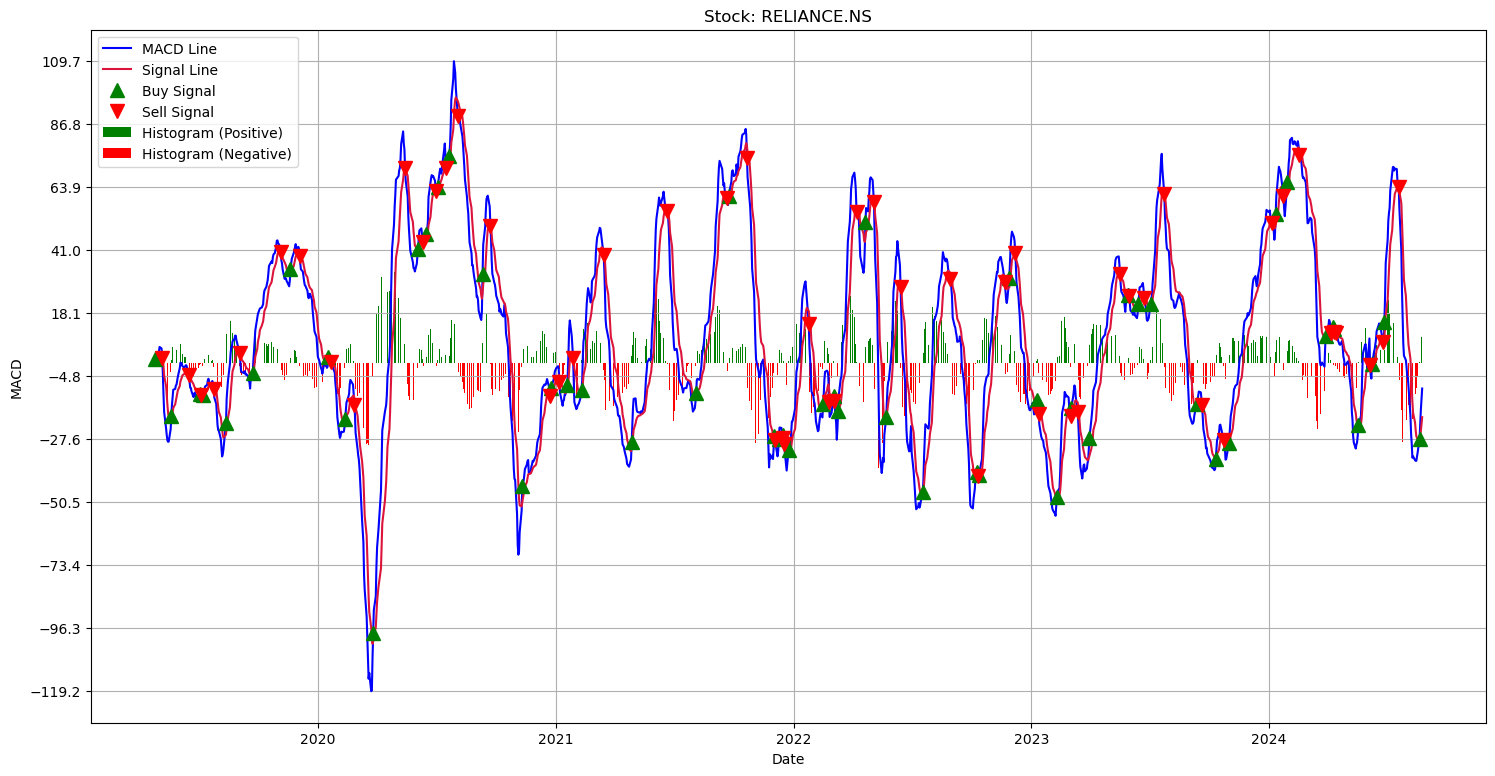

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the calculate_macd function
def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, min_periods=1, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

# Define buy and sell signals function
def generate_signals(macd_line, signal_line):
    signals = []
    prev_signal = None
    for macd, signal in zip(macd_line, signal_line):
        if macd > signal:
            if prev_signal != 'buy':
                signals.append('buy')
                prev_signal = 'buy'
            else:
                signals.append(None)
        elif macd < signal:
            if prev_signal != 'sell':
                signals.append('sell')
                prev_signal = 'sell'
            else:
                signals.append(None)
        else:
            signals.append(None)
    return signals

# Call the fetching_data function to get historical prices dataframe
df_info,  df_historical_prices, df_financial_ratios, df_balance_sheet = fetching_data(ticker_symbol)

# Set parameters for MACD calculation
short_window = 12
long_window = 26
signal_window = 9

# Calculate MACD
macd_line, signal_line, histogram = calculate_macd(df_historical_prices, short_window, long_window, signal_window)

# Generate buy and sell signals
buy_sell_signals = generate_signals(macd_line, signal_line)

# Plotting MACD Line, Signal Line, and Histogram
plt.figure(figsize=(18, 9))
plt.plot(df_historical_prices.index, macd_line, label='MACD Line', color='blue') # MACD Line
plt.plot(df_historical_prices.index, signal_line, label='Signal Line', color='crimson') # Signal Line

# Plotting histogram bars above zero line (positive values) in green
plt.bar(df_historical_prices.index[histogram >= 0], histogram[histogram >= 0], color='green', width=0.6, label='Histogram (Positive)')

# Plotting histogram bars below zero line (negative values) in red
plt.bar(df_historical_prices.index[histogram < 0], histogram[histogram < 0], color='red', width=0.6, label='Histogram (Negative)')

# Plotting buy signals
plt.plot(df_historical_prices.index, np.where(np.array(buy_sell_signals) == 'buy', macd_line, np.nan), '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plotting sell signals
plt.plot(df_historical_prices.index, np.where(np.array(buy_sell_signals) == 'sell', macd_line, np.nan), 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Stock: ' + ticker_symbol)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.grid(True)

y_min = min(macd_line.min(), signal_line.min(), histogram.min())
y_max = max(macd_line.max(), signal_line.max(), histogram.max())
y_range = y_max - y_min
plt.yticks(np.arange(y_min, y_max + 1, y_range / 10))

plt.show()

# Trial 2

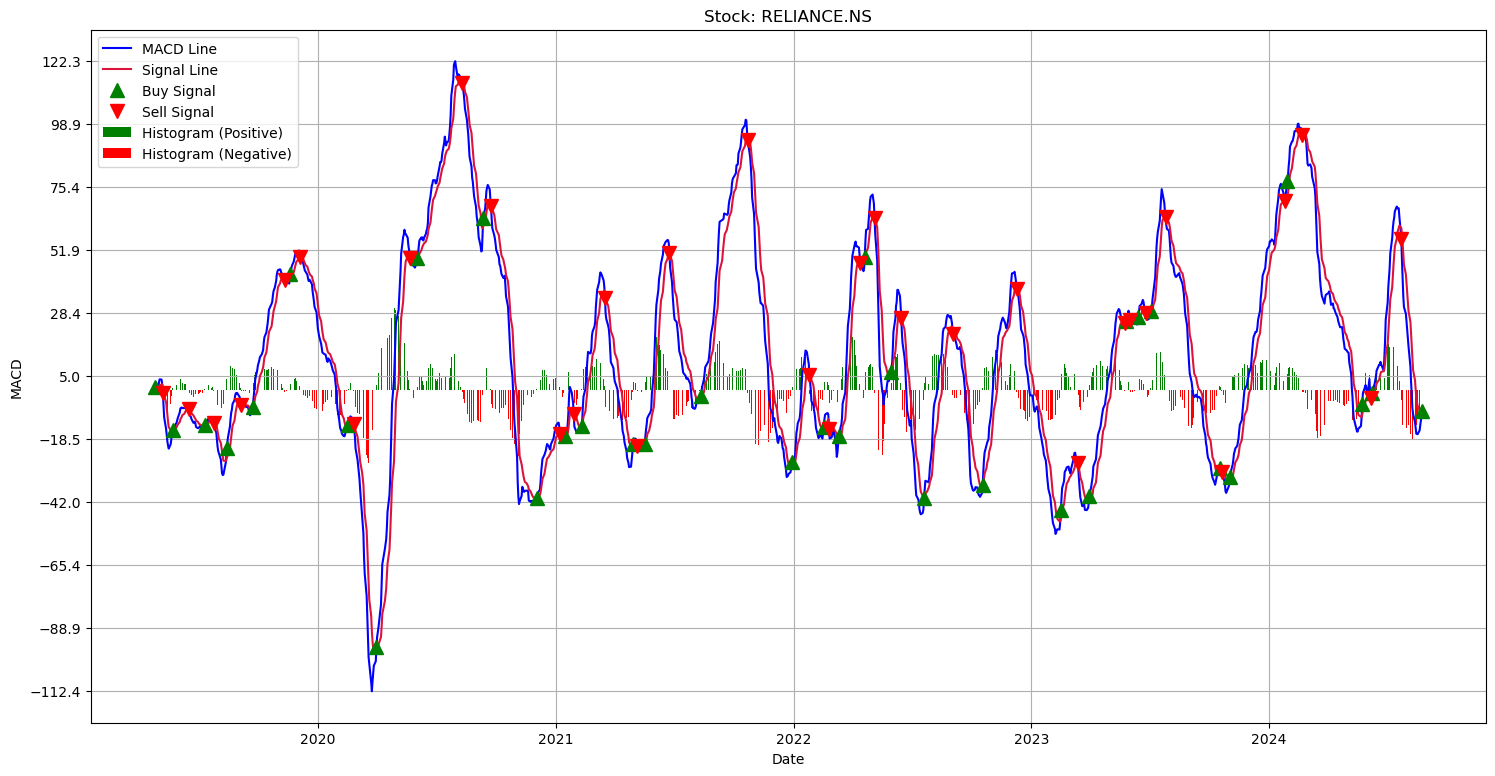

In [23]:
# Portfolio Strategy

def generate_portfolio_signals(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['Short_MA'] = calculate_sma(data, short_window)
    signals['Long_MA'] = calculate_sma(data, long_window)
    signals['RSI'] = calculate_rsi(data, window=14)
    signals['MACD'], signals['Signal'], signals['Histogram'] = calculate_macd(data, short_window, long_window, 9)
    signals['Buy'] = np.where((signals['Short_MA'] > signals['Long_MA']) & (signals['RSI'] < 30) & (signals['Histogram'] > 0), 1, 0)
    signals['Sell'] = np.where((signals['Short_MA'] < signals['Long_MA']) & (signals['RSI'] > 70) & (signals['Histogram'] < 0), -1, 0)
    return signals

# Set parameters for MACD calculation
short_window = 20
long_window = 40
signal_window = 9

# Calculate MACD
macd_line, signal_line, histogram = calculate_macd(df_historical_prices, short_window, long_window, signal_window)

def generate_signals(macd_line, signal_line):
    signals = []
    prev_signal = None
    for macd, signal in zip(macd_line, signal_line):
        if macd > signal:
            if prev_signal != 'buy':
                signals.append('buy')
                prev_signal = 'buy'
            else:
                signals.append(None)
        elif macd < signal:
            if prev_signal != 'sell':
                signals.append('sell')
                prev_signal = 'sell'
            else:
                signals.append(None)
        else:
            signals.append(None)
    return signals

# Generate buy and sell signals
buy_sell_signals = generate_signals(macd_line, signal_line)

# Plotting MACD Line, Signal Line, and Histogram
plt.figure(figsize=(18, 9))
plt.plot(df_historical_prices.index, macd_line, label='MACD Line', color='blue') # MACD Line
plt.plot(df_historical_prices.index, signal_line, label='Signal Line', color='crimson') # Signal Line

# Plotting histogram bars above zero line (positive values) in green
plt.bar(df_historical_prices.index[histogram >= 0], histogram[histogram >= 0], color='green', width=0.6, label='Histogram (Positive)')

# Plotting histogram bars below zero line (negative values) in red
plt.bar(df_historical_prices.index[histogram < 0], histogram[histogram < 0], color='red', width=0.6, label='Histogram (Negative)')

# Plotting buy signals
plt.plot(df_historical_prices.index, np.where(np.array(buy_sell_signals) == 'buy', macd_line, np.nan), '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plotting sell signals
plt.plot(df_historical_prices.index, np.where(np.array(buy_sell_signals) == 'sell', macd_line, np.nan), 'v', markersize=10, color='r', lw=0, label='Sell Signal')


plt.title('Stock: ' + ticker_symbol)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.grid(True)

y_min = min(macd_line.min(), signal_line.min(), histogram.min())
y_max = max(macd_line.max(), signal_line.max(), histogram.max())
y_range = y_max - y_min
plt.yticks(np.arange(y_min, y_max + 1, y_range / 10))

plt.show()